<div>
        <h1>Проект: Статистический анализ данных</h1>
        <p>Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.</p>
        <p>Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:</p>
        <ul>
            <li>без подписки
                <ul>
                    <li>абонентская плата отсутствует;</li>
                    <li>стоимость одной минуты поездки — 8 рублей;</li>
                    <li>стоимость старта (начала поездки) — 50 рублей;</li>
                </ul>
            </li>
            <li>с подпиской Ultra
                <ul>
                    <li>абонентская плата — 199 рублей в месяц;</li>
                    <li>стоимость одной минуты поездки — 6 рублей;</li>
                    <li>стоимость старта — бесплатно.</li>
                </ul>
            </li>
        </ul>
        <h2>Описание данных</h2>
        <p>В основных данных есть информация о пользователях, их поездках и подписках.</p>
        <h3>Пользователи — <code>users_go.csv</code></h3>
        <table>
            <tr>
                <th>Поле</th>
                <th>Описание</th>
            </tr>
            <tr>
                <td>user_id</td>
                <td>уникальный идентификатор пользователя</td>
            </tr>
            <tr>
                <td>name</td>
                <td>имя пользователя</td>
            </tr>
            <tr>
                <td>age</td>
                <td>возраст</td>
            </tr>
            <tr>
                <td>city</td>
                <td>город</td>
            </tr>
            <tr>
                <td>subscription_type</td>
                <td>тип подписки (free, ultra)</td>
            </tr>
        </table>
        <h3>Поездки — <code>rides_go.csv</code></h3>
        <table>
            <tr>
                <th>Поле</th>
                <th>Описание</th>
            </tr>
            <tr>
                <td>user_id</td>
                <td>уникальный идентификатор пользователя</td>
            </tr>
            <tr>
                <td>distance</td>
                <td>расстояние, которое пользователь проехал в текущей сессии (в метрах)</td>
            </tr>
            <tr>
                <td>duration</td>
                <td>продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»</td>
            </tr>
            <tr>
                <td>date</td>
                <td>дата совершения поездки</td>
            </tr>
        </table>
        <h3>Подписки — <code>subscriptions_go.csv</code></h3>
        <table>
            <tr>
                <th>Поле</th>
                <th>Описание</th>
            </tr>
            <tr>
                <td>subscription_type</td>
                <td>тип подписки</td>
            </tr>
            <tr>
                <td>minute_price</td>
                <td>стоимость одной минуты поездки по данной подписке</td>
            </tr>
            <tr>
                <td>start_ride_price</td>
                <td>стоимость начала поездки</td>
            </tr>
            <tr>
                <td>subscription_fee</td>
                <td>стоимость ежемесячного платежа</td>
            </tr>
        </table>
        <h2>Этапы исследования</h1>
        <ol>
            <li>Загрузка данных</li>
            <li>Предобработка данных</li>
            <li>Исследовательский анализ данных</li>
            <li>Объединение данных</li>
            <li>Подсчёт выручки</li>
            <li>Проверка гипотез</li>
            <li>Распределения</li>
        </ol>
    </div>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('datasets/users_go.csv')
    rides = pd.read_csv('datasets/rides_go.csv')
    subscriptions = pd.read_csv('datasets/subscriptions_go.csv')
except FileNotFoundError:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
display(users.head())
display(rides.head())
display(subscriptions.head())

display(users.info())
display(rides.info())
display(subscriptions.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

#### Шаг 2. Предобработка данных

Изменим тип данных на Datetime и добавим новый столбец с номером месяца

In [4]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
display(rides['date'].dt.year.unique())

rides['month_number'] = rides['date'].dt.month

array([2021], dtype=int32)

Обработка пропущенных значений

In [5]:
print(users.isna().sum())
print()
print(rides.isna().sum())
print()
print(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропущенных значений нет

Обработка дубликатов

In [6]:
display(users.duplicated().sum())
display(rides.duplicated().sum())

users = users.drop_duplicates()
rides = rides.drop_duplicates()

31

0

Явные дубликаты были удалены, неявные дубликаты не обнаружены

#### Шаг 3. Исследовательский анализ данных

Частота встречаемости городов

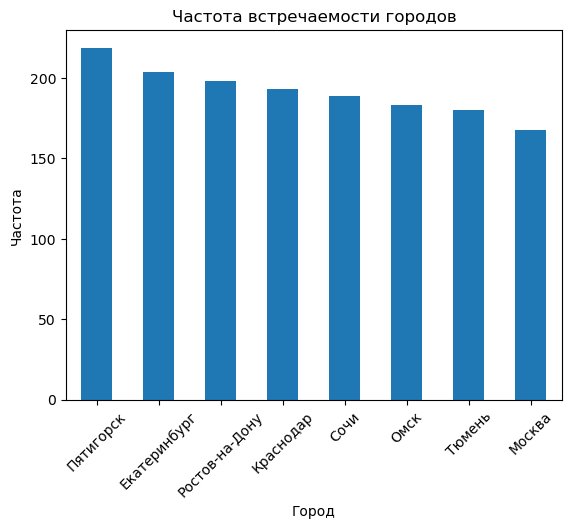

In [7]:
city_counts = users['city'].value_counts()

city_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.ylabel('Частота')
plt.title('Частота встречаемости городов')
plt.show()

Исходя из имеющихся данных, чаще всего берут самокаты в аренду в Пятигорске и реже всего в Москве

Соотношение пользователей с подпиской и без подписки

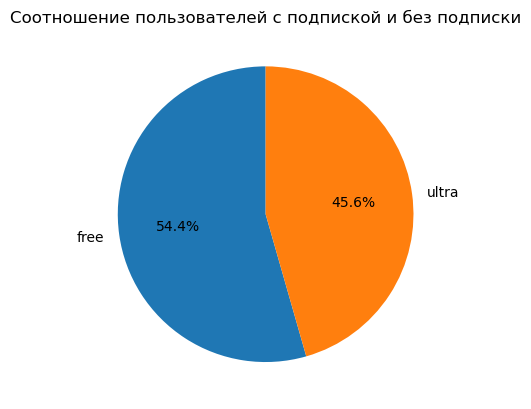

In [8]:
subscription_ratios = users['subscription_type'].value_counts(normalize=True)

subscription_ratios.plot(kind='pie', autopct='%1.1f%%', startangle=90,)
plt.ylabel('')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Пользователей без подписки (54,1%) больше, чем пользователей с подпиской (45,9%)

Возраст пользователей

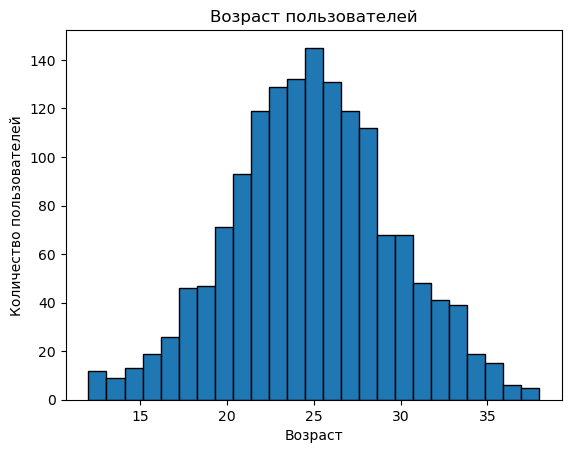

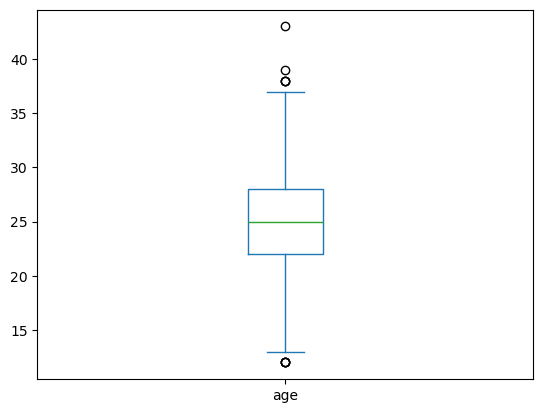

In [9]:
users['age'].plot(kind='hist', bins=25, edgecolor='black', range=(12, 38))
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Возраст пользователей')
plt.show()

users['age'].plot(kind='box');

Больше всего пользователей в возрасте 25 лет

Расстояние, которое пользователь преодолел за одну поездку

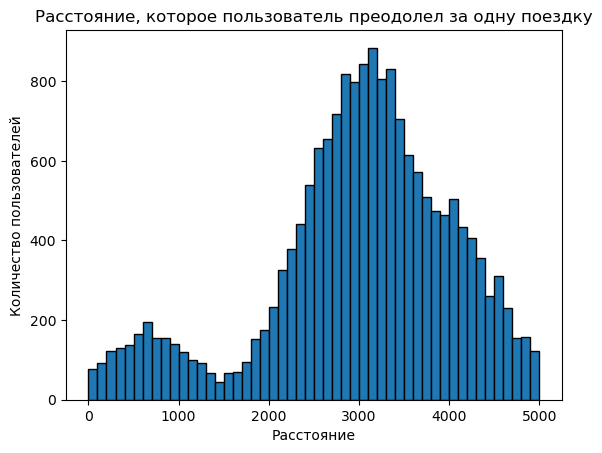

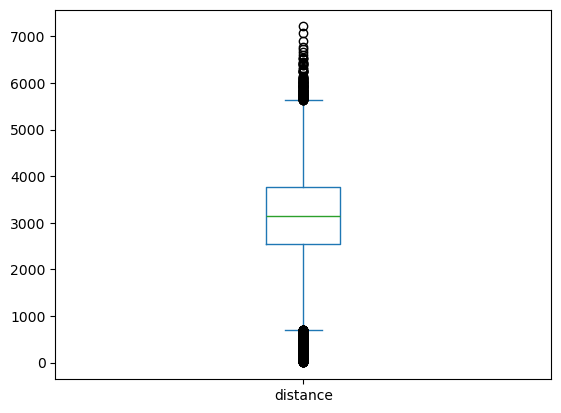

In [10]:
rides['distance'].plot(kind='hist', bins=50, edgecolor='black', range=(0, 5000));
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

rides['distance'].plot(kind='box');

Самое популярное пройденное расстояние ~3000 метров

Продолжительность поездок

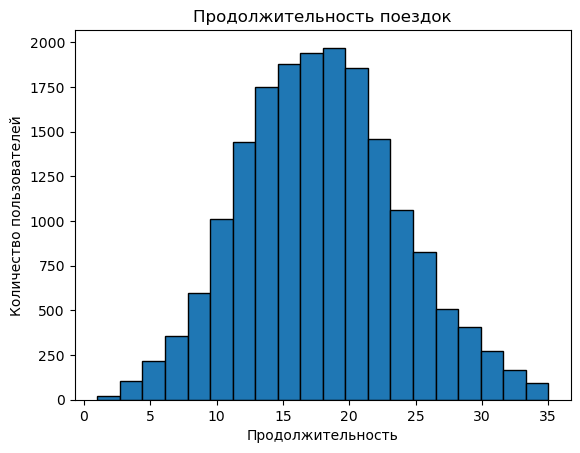

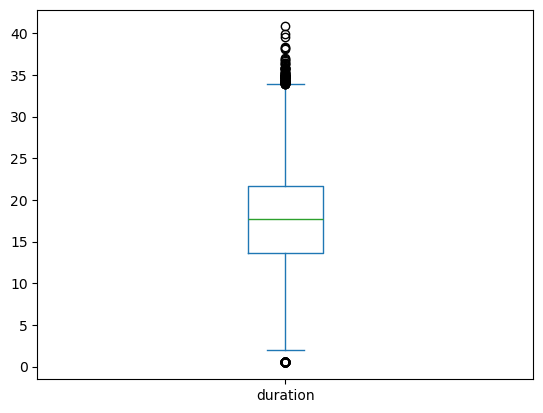

In [11]:
rides['duration'].plot(kind='hist', bins=20, edgecolor='black', range=(1, 35));
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок')
plt.show()

rides['duration'].plot(kind='box');

Поездки обычно длятся от 15 до 20 минут

#### Шаг 4. Объединение данных

Объединим все таблицы в одну

In [12]:
print('Размеры таблиц до объединения:')
print(f'Пользователи: {users.shape[0]} строк')
print(f'Поездки: {rides.shape[0]} строк')
print(f'Подписки: {subscriptions.shape[0]} строки')

user_rides = users.merge(rides, on='user_id', how='inner')

data = user_rides.merge(subscriptions, on='subscription_type', how='inner')

print(f'Размеры таблицы после объединения: {data.shape[0]}')
data

Размеры таблиц до объединения:
Пользователи: 1534 строк
Поездки: 18068 строк
Подписки: 2 строки
Размеры таблицы после объединения: 18068


,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Создадим отдельные таблицы для пользователей без подписки и пользователей с подпиской

In [13]:
without_subscription = data[data['subscription_type'] == 'free']
display(without_subscription.head())

with_subscription = data[data['subscription_type'] == 'ultra']
display(with_subscription.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Визуализация пройденного расстояния для пользователей каждой категории

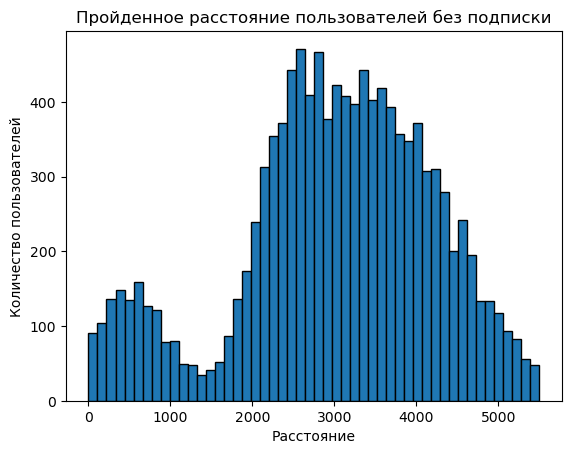

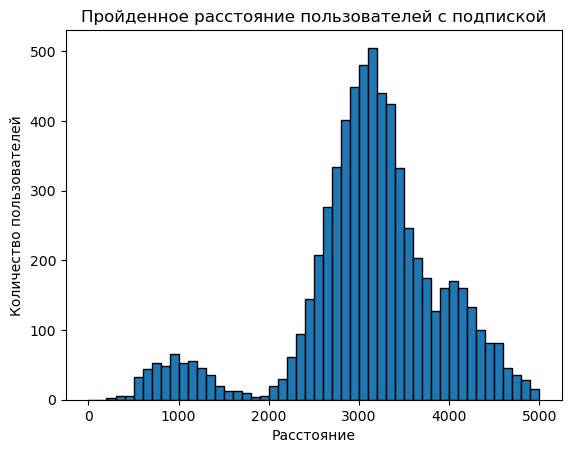

In [14]:
without_subscription['distance'].plot(kind='hist', bins=50, edgecolor='black', range=(0, 5500));
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.title('Пройденное расстояние пользователей без подписки')
plt.show()

with_subscription['distance'].plot(kind='hist', bins=50, edgecolor='black', range=(0, 5000));
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.title('Пройденное расстояние пользователей с подпиской')
plt.show()

У пользователей без подписки чаще происходят короткие поездки (до 1000 метров) <br/>
Пользователи с подпиской обычно проезжают от 2000 до 4000 метров, коротких поездок почти нет

Визуализация продолжительности поездок для пользователей каждой категории

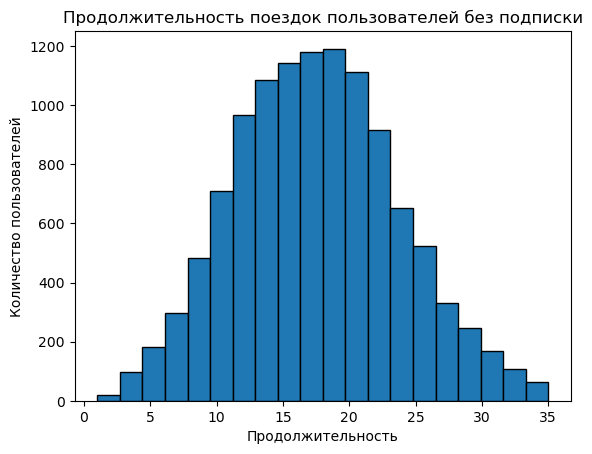

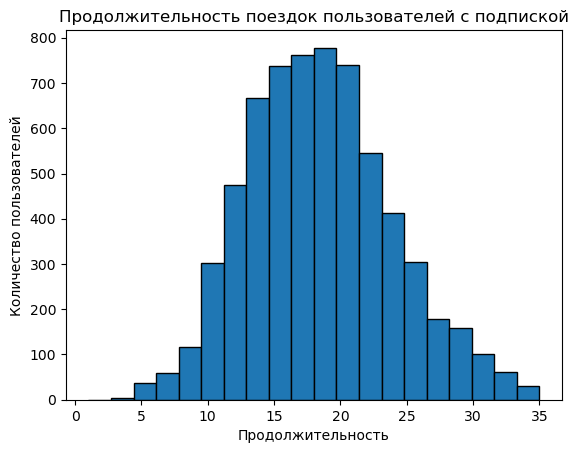

In [15]:
without_subscription['duration'].plot(kind='hist', bins=20, edgecolor='black', range=(1, 35));
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок пользователей без подписки')
plt.show()

with_subscription['duration'].plot(kind='hist', bins=20, edgecolor='black', range=(1, 35));
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок пользователей с подпиской')
plt.show()

Продолжительности поездок для пользователей без подписки и с подпиской практически одинаковые. Пользователи без подписки чу-чуть чаще арендуют самокаты для коротких поездок

#### Шаг 5. Подсчёт выручки

Проверим сводную таблицу на пропуски

In [16]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Сводная таблица с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц

In [17]:
data['duration'] = np.ceil(data['duration'])
rides_df = pd.pivot_table(data, index=['user_id', 'subscription_type'], columns=['month_number'],
                          values=['distance', 'duration'], aggfunc={
        'distance': 'sum',
        'duration': ['sum', 'count']
    }, fill_value=0)


rides_df.columns = ['_'.join(map(str, col)).strip() for col in rides_df.columns.values]
rides_df = rides_df.reset_index()

rides_df = rides_df.merge(subscriptions, on='subscription_type', how='left')

rides_df

,user_id,subscription_type,distance_sum_1,distance_sum_2,distance_sum_3,distance_sum_4,distance_sum_5,distance_sum_6,distance_sum_7,distance_sum_8,...,duration_sum_6,duration_sum_7,duration_sum_8,duration_sum_9,duration_sum_10,duration_sum_11,duration_sum_12,minute_price,start_ride_price,subscription_fee
0,1,ultra,7027.511294,0.000000,0.000000,754.159807,0.000000,0.000000,0.000000,6723.470560,...,0.0,0.0,46.0,0.0,32.0,56.0,28.0,6,0,199
1,2,ultra,0.000000,0.000000,10187.723006,6164.381824,0.000000,3255.338202,6780.722964,923.007439,...,14.0,48.0,7.0,0.0,19.0,0.0,12.0,6,0,199
2,3,ultra,3061.777147,5421.152016,0.000000,2956.651632,9064.026918,0.000000,10919.595403,0.000000,...,0.0,67.0,0.0,23.0,0.0,0.0,13.0,6,0,199
3,4,ultra,0.000000,6339.696747,0.000000,0.000000,0.000000,6753.041806,10491.175555,4649.488243,...,45.0,56.0,36.0,0.0,79.0,28.0,0.0,6,0,199
4,5,ultra,3914.646990,2561.108241,10633.732186,3373.080412,5823.074031,0.000000,3311.974724,2720.817111,...,0.0,12.0,18.0,0.0,20.0,0.0,0.0,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530,free,239.330892,2724.331740,6618.024550,9846.644422,7606.452979,2587.068383,0.000000,2237.180181,...,17.0,0.0,11.0,0.0,73.0,37.0,0.0,8,50,0
1530,1531,free,711.666072,3022.478610,0.000000,13021.538366,13526.161364,4041.878778,6163.690446,10526.548720,...,28.0,39.0,58.0,21.0,33.0,35.0,0.0,8,50,0
1531,1532,free,2615.477834,0.000000,0.000000,842.097458,303.787850,0.000000,3735.879274,8774.460732,...,0.0,18.0,47.0,0.0,21.0,60.0,42.0,8,50,0
1532,1533,free,3438.600356,310.488247,12822.696276,2514.498956,0.000000,1034.998188,8772.518529,4581.943632,...,7.0,48.0,22.0,0.0,0.0,26.0,0.0,8,50,0


Добавим столбец с помесячной выручкой

In [18]:
def count_income (start_price, count_rides, minute_price, total_duration, subscription_fee):
    return start_price * count_rides + minute_price * total_duration + subscription_fee

def set_monthly_income(row):
    start_price = row['start_ride_price']
    minute_price = row['minute_price']
    subscription_fee = row['subscription_fee']

    for i in range(1, 13):
        count_rides_col = f'duration_count_{i}'
        total_duration_col = f'duration_sum_{i}'
        
        count_rides = row[count_rides_col]
        total_duration = row[total_duration_col]

        income = count_income(start_price, count_rides, minute_price, total_duration, subscription_fee)

        income_col = f'monthly_income_{i}'
        row[income_col] = income

    return row

rides_df = rides_df.apply(set_monthly_income, axis=1)

rides_df

,user_id,subscription_type,distance_sum_1,distance_sum_2,distance_sum_3,distance_sum_4,distance_sum_5,distance_sum_6,distance_sum_7,distance_sum_8,...,monthly_income_3,monthly_income_4,monthly_income_5,monthly_income_6,monthly_income_7,monthly_income_8,monthly_income_9,monthly_income_10,monthly_income_11,monthly_income_12
0,1,ultra,7027.511294,0.000000,0.000000,754.159807,0.000000,0.000000,0.000000,6723.470560,...,199.0,241.0,199.0,199.0,199.0,475.0,199.0,391.0,535.0,367.0
1,2,ultra,0.000000,0.000000,10187.723006,6164.381824,0.000000,3255.338202,6780.722964,923.007439,...,577.0,439.0,199.0,283.0,487.0,241.0,199.0,313.0,199.0,271.0
2,3,ultra,3061.777147,5421.152016,0.000000,2956.651632,9064.026918,0.000000,10919.595403,0.000000,...,199.0,325.0,577.0,199.0,601.0,199.0,337.0,199.0,199.0,277.0
3,4,ultra,0.000000,6339.696747,0.000000,0.000000,0.000000,6753.041806,10491.175555,4649.488243,...,199.0,199.0,199.0,469.0,535.0,415.0,199.0,673.0,367.0,199.0
4,5,ultra,3914.646990,2561.108241,10633.732186,3373.080412,5823.074031,0.000000,3311.974724,2720.817111,...,541.0,289.0,397.0,199.0,271.0,307.0,199.0,319.0,199.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530,free,239.330892,2724.331740,6618.024550,9846.644422,7606.452979,2587.068383,0.000000,2237.180181,...,324.0,580.0,412.0,186.0,0.0,138.0,0.0,784.0,396.0,0.0
1530,1531,free,711.666072,3022.478610,0.000000,13021.538366,13526.161364,4041.878778,6163.690446,10526.548720,...,0.0,840.0,784.0,324.0,412.0,614.0,218.0,364.0,380.0,0.0
1531,1532,free,2615.477834,0.000000,0.000000,842.097458,303.787850,0.000000,3735.879274,8774.460732,...,0.0,122.0,114.0,0.0,194.0,476.0,0.0,218.0,680.0,436.0
1532,1533,free,3438.600356,310.488247,12822.696276,2514.498956,0.000000,1034.998188,8772.518529,4581.943632,...,944.0,194.0,0.0,106.0,534.0,226.0,0.0,0.0,258.0,0.0


#### Шаг 6. Проверка гипотез

In [19]:
alpha = 0.05

Тратят ли пользователи с подпиской больше времени на поездки?


Нулевая гипотеза - Среднее время поездки пользователей с подпиской не больше среднего времени поездки пользователей без подписки <br />
Альтернативная гипотеза - Среднее время поездки пользователей с подпиской больше среднего времени поездки пользователей без подписки

In [20]:
results = st.ttest_ind(with_subscription['duration'], without_subscription['duration'], alternative='greater')

print(f'P-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользователи с подпиской действительно тратят больше времени на поездки')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Нет достаточных доказательств того, что пользователи с подпиской тратят больше времени на поездки')

P-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу. Пользователи с подпиской действительно тратят больше времени на поездки


Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров <br />
Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров

In [21]:
distance = 3130

results = st.ttest_1samp(with_subscription['distance'], distance, alternative='greater')

print(f'P-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользователи с подпиской проезжают за одну поездку больше 3130 метров')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Нет достаточных доказательств, что пользователи с подпиской проезжают за одну поездку больше 3130 метров')

P-value: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу. Нет достаточных доказательств, что пользователи с подпиской проезжают за одну поездку больше 3130 метров


Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая гипотеза - месячная выручка от пользователей с подпиской по месяцам не выше, чем выручка от пользователей без подписки <br />
Альтернативная гипотеза - месячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [22]:
monthly_income_columns = [f'monthly_income_{i}' for i in range(1, 13)]

monthly_income_with_sub = rides_df[rides_df['subscription_type'] == 'ultra'][monthly_income_columns]
monthly_income_without_sub = rides_df[rides_df['subscription_type'] == 'free'][monthly_income_columns]

income_arr_with_sub = monthly_income_with_sub.values.flatten()
income_arr_without_sub = monthly_income_without_sub.values.flatten()

results = st.ttest_ind(income_arr_with_sub, income_arr_without_sub, alternative='greater')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Месячная выручка по месяцам от пользователей с подпиской выше, чем выручка от пользователей без подписки')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Нет достаточных доказательств, что месячная выручка по месяцам от пользователей с подпиской выше, чем выручка от пользователей без подписки')

Отвергаем нулевую гипотезу. Месячная выручка по месяцам от пользователей с подпиской выше, чем выручка от пользователей без подписки


Месячная выручка по месяцам от пользователей с подпиской вероятнее всего больше, чем у пользователей без подписки

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: Двухвыборочный t-тест для зависимых выборок

#### Шаг 7. Распределения

7.1 <br/>
Цель: 100+ клиентов должны продлить подписку <br />
Вероятность продления подписки после тестового периода: 10% (0.1)

Задача: найти какое минимальное количество промокодов нужно разослать, чтобы вероятность НЕ выполнить план была примерно 5%

1161 промокодов достаточно для того, чтобы вероятность не выполнить план была менее 5%


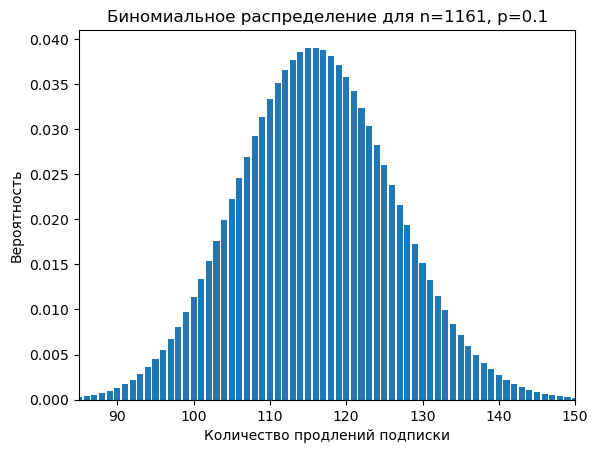

In [23]:
p = 0.1
target = 100
# n - количество промокодов
n = 100
while True:
    prob = st.binom.cdf(target - 1, n, p)
    if prob <= alpha:
        print(f'{n} промокодов достаточно для того, чтобы вероятность не выполнить план была менее 5%')
        break
    else:
        n += 1

prob_pmf = st.binom.pmf(target, n, p)

x = range(n+1)
pmf = st.binom.pmf(x, n, p)

plt.bar(x, pmf)
plt.xlim(85, 150)
plt.xlabel('Количество продлений подписки')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение для n={n}, p={p}')
plt.show()

In [24]:
from math import sqrt

# задаём параметры биномиального распределения
n = 1000000
p = 0.4
# зададим параметры нормального распределения равными мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
# задаём нормальное распределение
distr = st.norm(mu, sigma) 
# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


# Вывод
В ходе исследования были выполнены следующие действия:
1. Загружены данные из 3 CSV файлов
2. Выполнена предобработка данных. Данные были проверены на наличие дубликатов, даты преобразованы в тип данных pandas date
3. В ходе исследовательского анализа было выяснено: <br/> 1. Самый часто встречаемый город Пятигорск, реже всего встречаемый - Москва. <br/> 2. Пользователей без подписки больше, чем пользователей с подпиской. <br/> 3. Самый популярный возраст - 25 лет. <br/> 4. Самое популярное пройденное расстояние ~3000 метров <br/> 5. Поездки обычно длятся от 15 до 20 минут. 
4. Были созданы отдельные датафреймы для пользователей с подпиской и без.<br/> Результаты исследований: <br/> <ul> <li>У пользователей без подписки чаще происходят короткие поездки (до 1000 метров). Пользователи с подпиской обычно проезжают от 2000 до 4000 метров, коротких поездок почти нет. </li> <li> Продолжительности поездок для пользователей без подписки и с подпиской практически одинаковые. Пользователи без подписки чу-чуть чаще арендуют самокаты для коротких поездок </li> </ul>
5. Была подсчитана ежемесячная выручка для каждого пользователя
6. Проверка гипотез: <br /> <ol><li>Тратят ли пользователи с подпиской больше времени на поездки? Пользователи с подпиской тратят больше времени на поездки</li><li>Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Нет достаточных доказательств, что пользователи с подпиской проезжают за одну поездку больше 3130 метров</li> <li>Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?Месячная выручка по месяцам от пользователей с подпиской вероятнее всего больше, чем у пользователей без подписки</li></ol>
7. Распределения. 1161 промокодов достаточно для того, чтобы вероятность не выполнить план была менее 5%

<b>Рекомендация:</b> Продолжать продвижение покупки подписки, так как пользователи с подпиской в среднем пользуются самокатами дольше, проезжают большее расстояние, платят ежемесячный взнос за подписку и, следовательно, приносят больше денег компании
